<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/special_topics/workshop4/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing and Evaluating an Anomaly Detection System

An autoencoder uses two components: an encoder and a decoder. The encoder accepts the input data and compresses it into the latent-space representation. The decoder then attempts to reconstruct the input data from the latent space.\

The very basic idea of anomalies is really centered around two values - extremely high values and extremely low values.

Name of the employees of an organization
Salaries of those employees (in USD) within a range of 1000 to 2500 (Monthly)

In [ ]:
!pip install faker

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comment out the following line if you are using Jupyter Notebook
# %matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

# Import Faker
from faker import Faker
fake = Faker()

# To ensure the results are reproducible
Faker.seed(4321)

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

print("names list ", names_list)
# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

names list  ['Jason Brown', 'Jacob Stein', 'Cody Brown', 'Larry Morales', 'Jessica Hendricks', 'Brian Moore', 'Scott Baker', 'Ruth Hoffman', 'Daniel George', 'David Moody', 'Brian Maxwell', 'Cory Cooper', 'Morgan Foster', 'James Sandoval', 'Brian Lester', 'Anne Davis', 'Miss Amanda Harris MD', 'Amy Dunn', 'Brian Lee', 'Kimberly Pratt', 'Russell Yang', 'Renee Fisher', 'Rebecca Castro', 'Robert Yoder', 'Todd Young', 'John Houston', 'Matthew Valdez', 'Gary Nguyen', 'Alexander Poole', 'Dean Welch', 'Andrew Perez', 'Brian Porter', 'Aaron Walker', 'Lisa Wilson', 'Brian Miller', 'Nicholas Evans', 'Jessica Hernandez', 'Teresa Haynes', 'Angela Maynard', 'Stephanie Gregory', 'Phyllis Hess', 'Stephen Martin', 'Emily Blair', 'Hannah Holland', 'Adam Hoffman', 'Holly Roberts', 'Jeffrey Brown', 'Sarah Keith', 'Sean Weeks', 'Tony Lloyd', 'Caleb Davidson', 'Andrew Patterson', 'Joshua Ellis', 'Cassandra Lewis', 'Sabrina Wallace', 'Derek Allison', 'Taylor Dawson', 'Allison Yoder', 'Jo Brown', 'Jennifer M

In [ ]:
salary_df.at[16, 'Salary (in USD)'] = 23 #Set value at specified row/column pair

salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


Detecting anomalies just by seeing

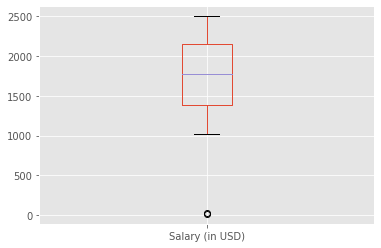

In [ ]:
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

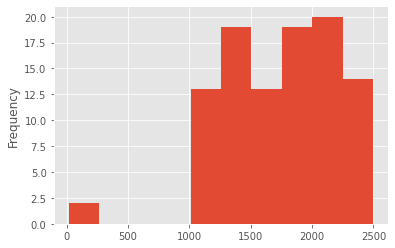

In [ ]:
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

we can see there's one particular bin that is just not right as it deviates hugely from the rest of the data

In [ ]:
# Minimum and maximum salaries
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


Clustering based approach for anomaly detection


In [ ]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1) #Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown 
salary_raw = salary_raw.astype('float64')

In [ ]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans,vq
    
# Specify the data and the number of clusters to kmeans()
codebook, distortion = kmeans(salary_raw, 4)


In [ ]:
# Get the groups (clusters) and distances
groups, cdist = vq(salary_raw, codebook)
print("groups ",groups)
print("cdist" , cdist)

groups  [1 2 1 1 1 3 2 2 2 1 1 1 3 3 3 2 0 2 1 3 2 3 1 2 2 2 2 2 1 3 2 3 2 1 1 1 2
 3 3 1 2 2 2 3 1 1 2 2 3 3 3 1 3 3 2 2 2 2 1 3 2 1 3 1 3 0 1 2 3 3 1 2 2 3
 3 2 2 2 1 1 1 1 3 1 1 1 1 3 3 3 3 1 1 3 1 1 1 2 3 2]
cdist [126.51428571  44.54545455 235.48571429 200.48571429  90.51428571
 126.1        107.45454545  55.54545455 157.45454545 233.48571429
  43.48571429  64.48571429 238.9         62.9        111.1
  73.54545455   3.         191.45454545  89.48571429 147.1
 165.54545455  30.1         51.51428571 234.54545455 203.45454545
 196.54545455  84.45454545  88.54545455 118.51428571 156.1
 128.54545455  29.9         51.54545455  11.51428571  10.48571429
 100.51428571 221.45454545 242.9         20.9        192.48571429
 103.54545455  45.54545455 168.54545455 151.1         44.51428571
  98.48571429 133.45454545 108.45454545 147.1        188.9
  28.9         22.51428571  47.9         10.1        207.45454545
  76.45454545 150.45454545  89.54545455 209.51428571  33.9
  16.54545455  54.4857142

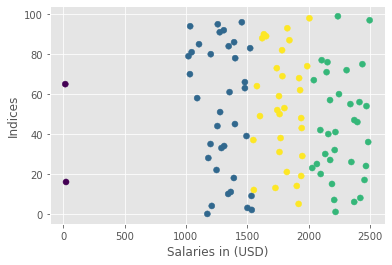

In [ ]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

Anomaly detection as a classification problem


In [ ]:
# First assign all the instances to 
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# Veirfy 
print(salary_df.loc[16])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object


In [ ]:
# Importing KNN module from PyOD
!pip install KNN
!pip install pyod
from pyod.models.knn import KNN


  Created wheel for KNN: filename=KNN-1.0.0-cp36-none-any.whl size=3134 sha256=3f93149cf0cda4c9fd586a3aed62c750e5142482f324cbab239647bbc53cffa2
  Stored in directory: /root/.cache/pip/wheels/0f/c7/72/df136c562fcab0ee6def2fd6ba7a2b229a7eed9caedd0a653f
Successfully built KNN
     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 2.1MB 8.4MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=fc1785eaf0e74a77c19b3bae8cdf6faa8807fa194fa05cd58ea7acf634e3a6b2
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=72fe4113c1215cd1b7127134c25c73e862e77fb515b3517230b5bd1428f7646d
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=2a6ebbf3e6dbf045c956d

In [ ]:
# Segregate the salary values and the class labels 
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values

# Train kNN detector
clf = KNN(contamination=0.02, n_neighbors=5)
# percentage of outliers
clf.fit(X)


# Get the prediction labels of the training data
y_train_pred = clf.labels_ 
print("prediction labels ", y_train_pred)    
# Outlier scores
y_train_scores = clf.decision_scores_
print("outliers", y_train_scores)

prediction labels  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
outliers [  68.   28.   35.   33.   39.   21.   43.   30.   46.   33.   36.   27.
   30.   34.   36.   28. 1024.   34.   35.   17.   48.   39.   39.   66.
   30.   39.   49.   29.   67.   26.   37.   21.   26.   30.   36.   49.
   47.   29.   15.   38.   25.   28.   51.   21.   33.   44.   41.   42.
   17.   50.   20.   29.   19.   31.   33.   57.   42.   28.   71.   18.
   39.   37.   13.   43.   43. 1030.   43.   54.   19.   24.   74.   29.
   63.   23.   49.   33.   22.   40.   46.   86.   47.   60.   21.   30.
   40.   74.   37.   60.   68.   76.   82.   26.   36.   43.   72.   30.
   54.   59.   61.   30.]


In [ ]:
# Import the utility function for model evaluation
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)
#check documentation for ouput https://pyod.readthedocs.io/en/latest/example.html'
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



KNN ROC:1.0, precision @ rank n:1.0


We see that the KNN() model was able to perform exceptionally good on the training data. It provides three metrics and their scores -

ROC
Precision along with a confidence rank

In [ ]:
# A salary of $37 (an anomaly right?)
X_test = np.array([[37.]])

In [ ]:
# Check what the model predicts on the given test data point
clf.predict(X_test)

array([1])

In [ ]:
# A salary of $1256
X_test_abnormal = np.array([[1256.]])

# Predict
clf.predict(X_test_abnormal)

array([0])

#Other references and links: 
- https://www.jeremyjordan.me/autoencoders/
- http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/
- https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html
- https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
- https://github.com/jeffheaton/t81_558_deep_learning/blob/b2fffd1b89d3d37adf4c9d82c4cbc991f871f3a3/t81_558_class_14_03_anomaly.ipynb
- https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/
- https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/
- https://www.edureka.co/blog/autoencoders-tutorial/



# Autoencoders

https://www.tensorflow.org/tutorials/generative/autoencoder

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

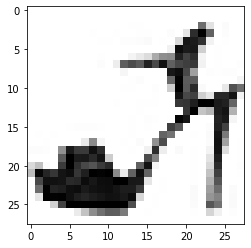

In [ ]:
plt.imshow(x_train[9], cmap="Greys")

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

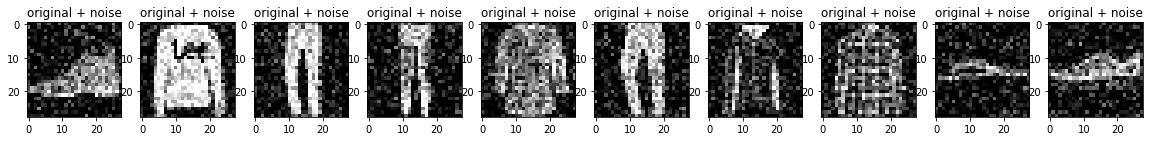

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0073 - val_loss: 0.0072


In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

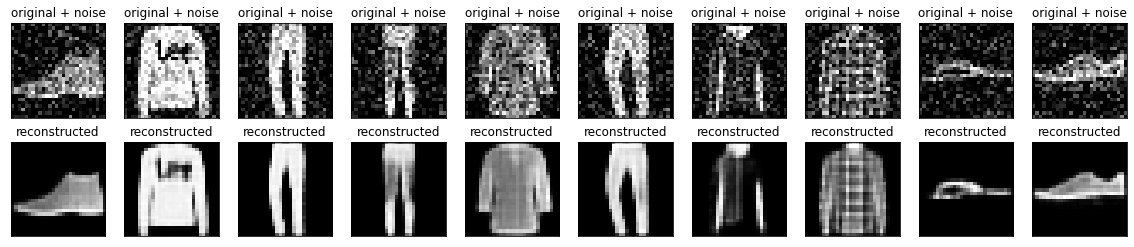

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()